# Gas Dynamics Scripts - Usage
## Flow Table

The isentropic flow table allows for the determination of the dimensionless variables of isentropic supersonic or subsonic flow with $\gamma = 1.4$ (Mach number, pressure ratio, temperature ratio, area ratio) given one of the values. 

The data for the flow table can be found at: http://www.cchem.berkeley.edu/cbe150a/isentropic_flow.pdf

In [1]:
from flow_table import print_flow_table, get_flow_values

In [2]:
print_flow_table('A', 3.6727, flow_type='supersonic')

Mach: 2.850569800569801 
Pressure Ratio: 0.03412037037037037 
Temperature Ratio: 0.3809088319088319 
Area Ratio: 3.6727


In [3]:
flow_values = get_flow_values('A', 3.6727)
print(flow_values)

[2.850569800569801, 0.03412037037037037, 0.3809088319088319, 3.6727]


## Shock Fitting
The shock fitting script includes various useful functions for the determination and analysis of pressure distributions, mainly to be used for airfoil analysis and design.

Finding the approximate lift coefficient of a pressure distribution with the Prandtl-Glauert correction

In [4]:
from shock_fitting import corrected_cl
import numpy as np

In [5]:
# given mach number
mach_num = 0.6

# given pressure distributions
def cp_upper(x):
    return -3.1 * np.power(x, 0.5) * (1 - x)

def cp_lower(x):
    return -1.3 * np.power(x, 0.5) * np.power((1 - x),2)

In [6]:
c_cl = corrected_cl(cp_upper, cp_lower, mach_num)

c_cl

0.7853568640935045

Plotting the corrected pressure distribution:

In [7]:
from shock_fitting import corrected_distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
upper_c, lower_c = corrected_distribution(cp_upper, cp_lower, mach_num)
x_vec = np.linspace(0, 1, 500)

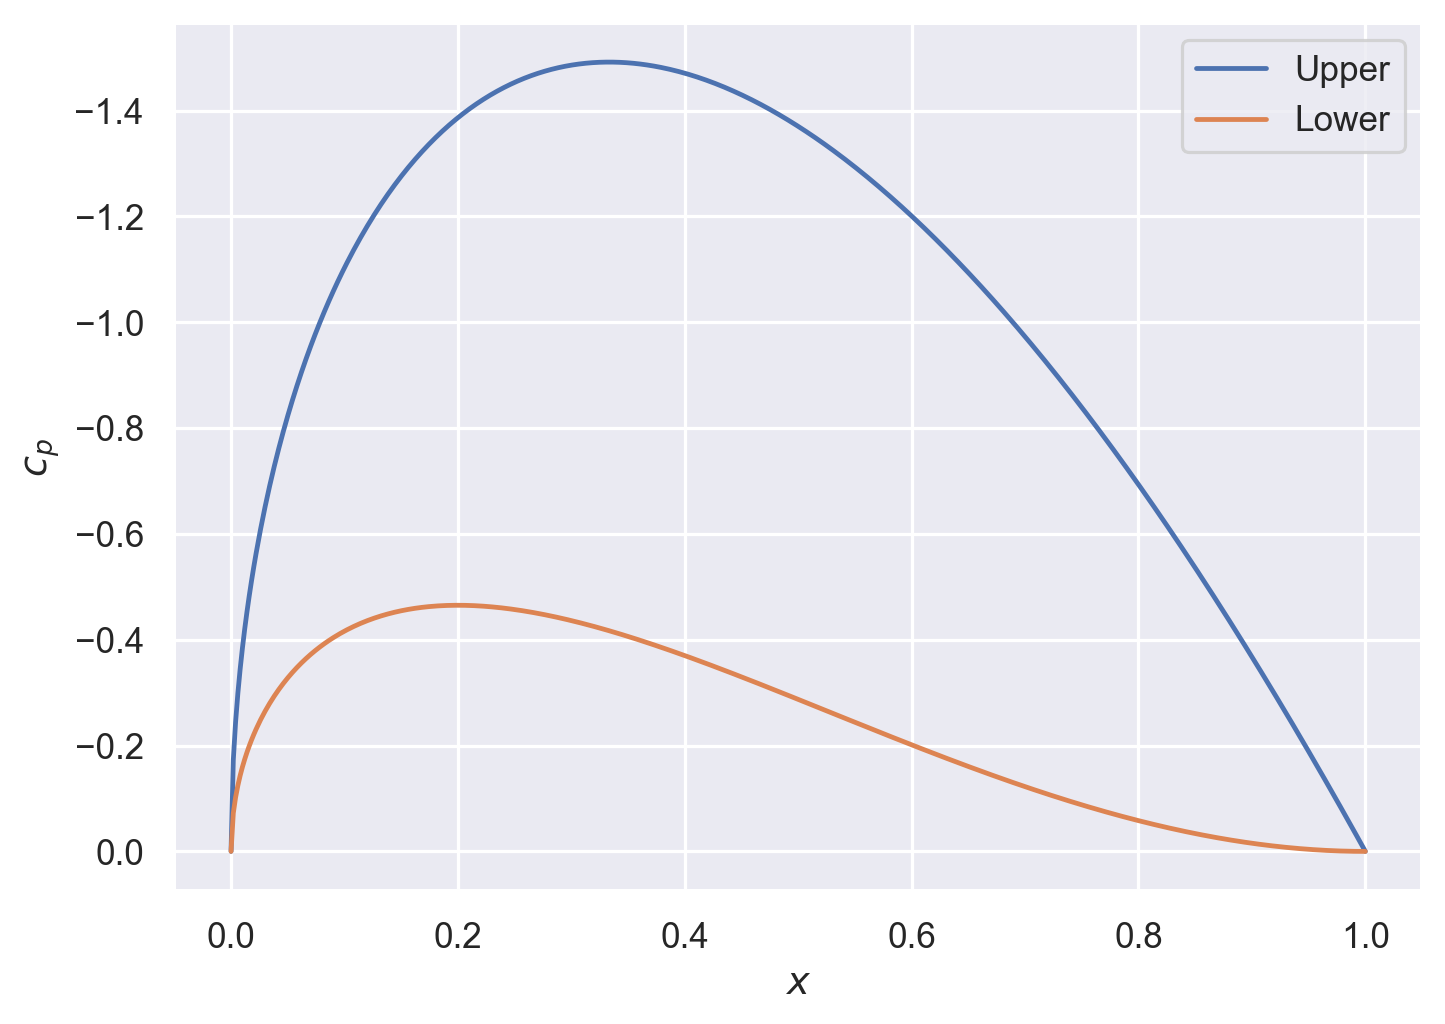

In [9]:
plt.figure(dpi=230, figsize=(7,5))

plt.plot(x_vec, upper_c, label='Upper')
plt.plot(x_vec, lower_c, label='Lower')

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()

plt.show()

Finding the critical pressure coefficient

In [10]:
from shock_fitting import critical_pressure_coef

In [11]:
crit_cp = critical_pressure_coef(mach_num)

crit_cp

-1.294343590455283